<a href="https://colab.research.google.com/github/brunoviti/DATAPROJECTS/blob/main/Ejercicio_poblacion_mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd

In [58]:
df_poblacion = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_y_territorios_dependientes_por_poblaci%C3%B3n')[0]

In [59]:
df_poblacion.head()

,N.º,País (o territorio dependiente),Proyección exponencial de la población al 1/7/2025[7]​,Total mun- dial (%),Cambio medio anual (%)[8]​,Cambio absoluto anual promedio,Cambio medio abs. total anual (%),Años para even- tual du- pli- ca- ción[9]​,"Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional",Fecha de esta última cifra de población en particular (d/mm/aaaa)[10]​,Tipo[11]​,Enlace o hipervínculo (usualmente de tipo oficial) de esta última cifra de población
0,1,India,1 417 492 000,1754,090,12 692 000,1524,78,1 417 492 000,1/07/2025,A,web.archive.org
1,2,China[12]​,1 407 934 000,1742,-005,-1 390 000,-,-,1 408 280 000,31/12/2024,E,www.stats.gov.cn
2,3,Estados Unidos,342 181 000,423,061,2 084 000,250,114,342 307 000,16/08/2025,R,www.census.gov
3,4,Indonesia,284 447 000,352,107,3 043 000,365,65,284 438 782,30/06/2025,E,www.bps.go.id
4,5,Pakistán,256 204 000,317,256,6 567 000,789,27,241 499 431,1/03/2023,C,www.pbs.gov.pk


In [60]:
df_poblacion.columns

Index(['N.º', 'País (o territorio dependiente)',
       'Proyección exponencial de la población al 1/7/2025[7]​',
       'Total mun- dial (%)', 'Cambio medio anual (%)[8]​',
       'Cambio absoluto anual promedio', 'Cambio medio abs. total anual (%)',
       'Años para even- tual du- pli- ca- ción[9]​',
       'Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional',
       'Fecha de esta última cifra de población en particular (d/mm/aaaa)[10]​',
       'Tipo[11]​',
       'Enlace o hipervínculo (usualmente de tipo oficial) de esta última cifra de población'],
      dtype='object')

In [70]:
df_poblacion = df_poblacion[df_poblacion['País (o territorio dependiente)'] != 'Mundo'].copy()

In [62]:
country_list = df_poblacion['País (o territorio dependiente)'].tolist()
print(country_list)

['India', 'China[12]\u200b', 'Estados Unidos', 'Indonesia', 'Pakistán', 'Nigeria', 'Brasil', 'Bangladés', 'Rusia[13]\u200b', 'México', 'Japón', 'Filipinas', 'República Democrática del Congo', 'Etiopía', 'Egipto', 'Vietnam', 'Irán', 'Turquía', 'Alemania', 'Reino Unido', 'Tanzania', 'Tailandia', 'Francia[14]\u200b', 'Sudáfrica', 'Italia', 'Colombia', 'Kenia', 'Sudán', 'Birmania', 'Corea del Sur', 'España[15]\u200b', 'Argelia', 'Argentina[16]\u200b', 'Uganda', 'Irak', 'Canadá', 'Ucrania[17]\u200b', 'Uzbekistán', 'Polonia', 'Afganistán', 'Marruecos[18]\u200b', 'Angola', 'Arabia Saudita', 'Yemen', 'Perú', 'Mozambique', 'Malasia', 'Ghana', 'Costa de Marfil', 'Madagascar', 'Nepal', 'Camerún', 'Venezuela[19]\u200b', 'Australia', 'Níger', 'Corea del Norte', 'Mali', 'Burkina Faso', 'Siria', 'República de China (o Taiwán)[20]\u200b', 'Sri Lanka', 'Zambia', 'Malaui', 'Kazajistán', 'Chile', 'Somalia', 'Chad', 'Senegal', 'Rumania', 'Guatemala', 'Países Bajos', 'Camboya', 'Ecuador', 'Zimbabue', 'Sudá

In [63]:
unique_countries_count = df_poblacion['País (o territorio dependiente)'].nunique()
unique_countries_count

245

In [64]:
# Clean and convert the column to numeric
df_poblacion['Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional'] = df_poblacion['Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional'].astype(str).str.replace(r'[^\d]', '', regex=True)
df_poblacion['Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional'] = pd.to_numeric(df_poblacion['Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional'], errors='coerce')

# Calculate the sum
sum_of_census = df_poblacion['Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional'].sum()

sum_of_census

np.float64(7997668119.0)

In [65]:
data = {'Medida': ['Número de países o territorios únicos', 'Suma del censo más reciente'],
        'Valor': [unique_countries_count, int(sum_of_census)]}
df_summary = pd.DataFrame(data)
display(df_summary)

,Medida,Valor
0,Número de países o territorios únicos,245
1,Suma del censo más reciente,7997668119


In [66]:
average_population = int(df_poblacion['Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional'].mean())
average_population

32777328

In [67]:
df_ranked_population = df_poblacion.sort_values(by='Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional', ascending=False)
display(df_ranked_population[['País (o territorio dependiente)', 'Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional']].head(10))

,País (o territorio dependiente),"Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional"
0,India,1.417492e+09
1,China[12]​,1.408280e+09
2,Estados Unidos,3.423070e+08
3,Indonesia,2.844388e+08
4,Pakistán,2.414994e+08
5,Nigeria,2.238000e+08
6,Brasil,2.125838e+08
7,Bangladés,1.698289e+08
8,Rusia[13]​,1.460283e+08
9,México,1.300542e+08


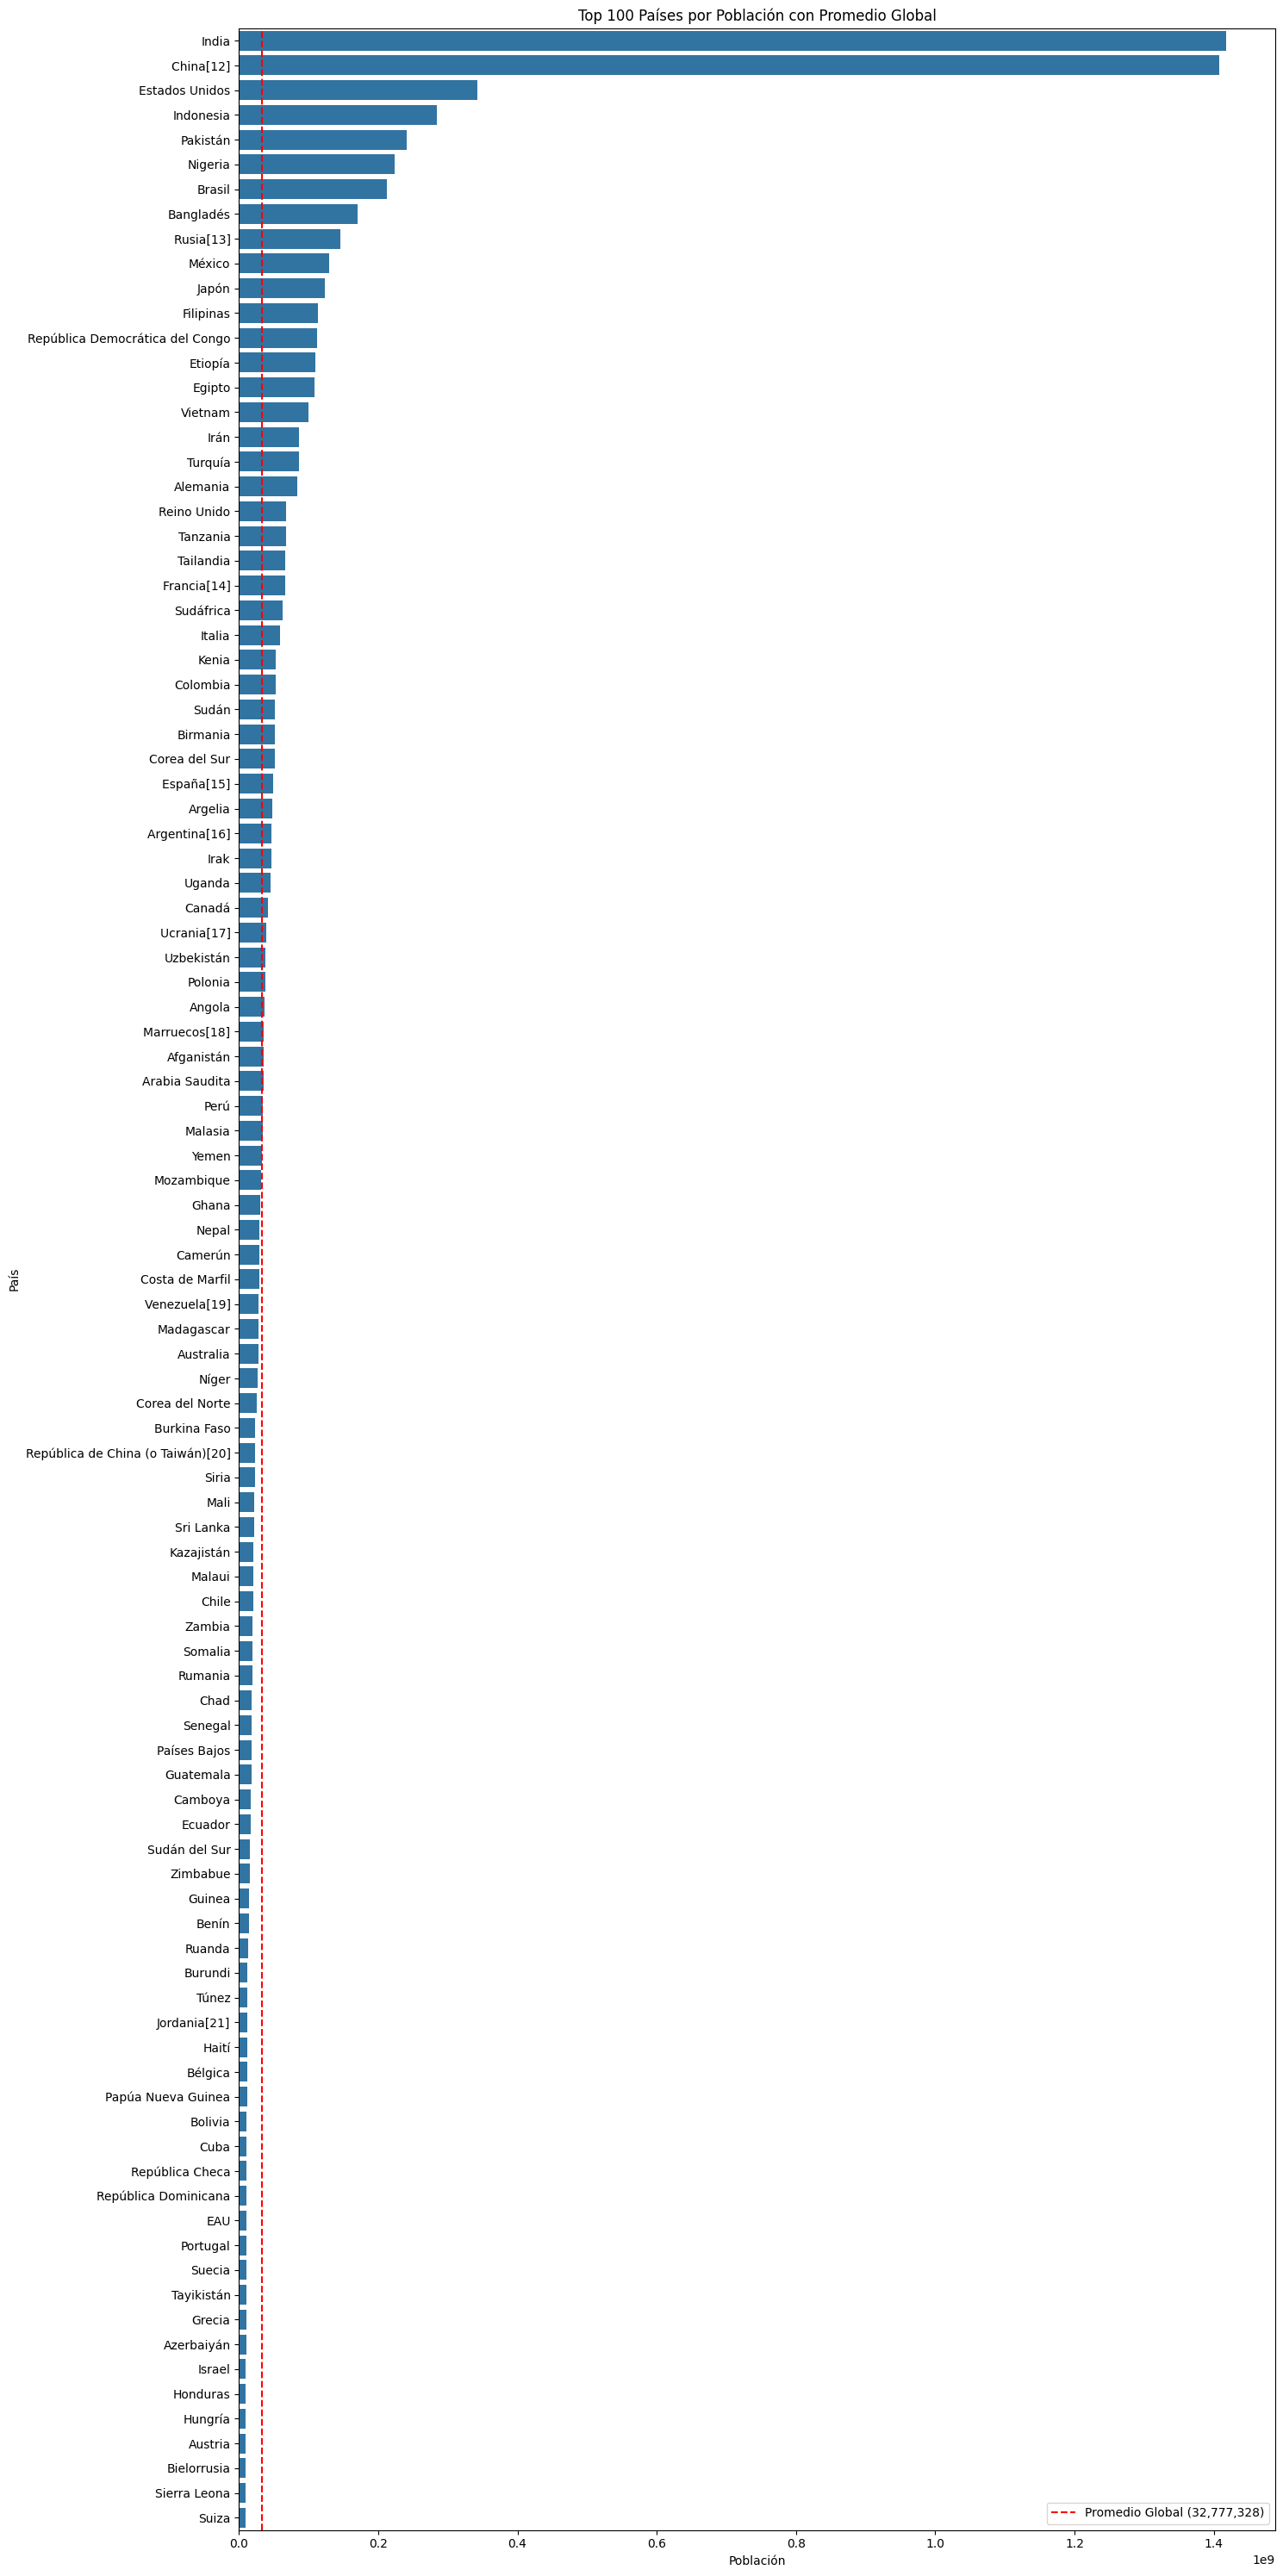

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 100 countries, excluding the 'Mundo' row
top_100_countries = df_ranked_population.head(101)

# Create the bar plot
plt.figure(figsize=(15, 30))
sns.barplot(x='Censo más reciente, última estimación oficial, proyección de la ONU o reloj de población nacional', y='País (o territorio dependiente)', data=top_100_countries)

# Add a horizontal line for the global average population
plt.axvline(x=average_population, color='red', linestyle='--', label=f'Promedio Global ({int(average_population):,})')

plt.title('Top 100 Países por Población con Promedio Global')
plt.xlabel('Población')
plt.ylabel('País')
plt.legend()
plt.tight_layout()
plt.show()

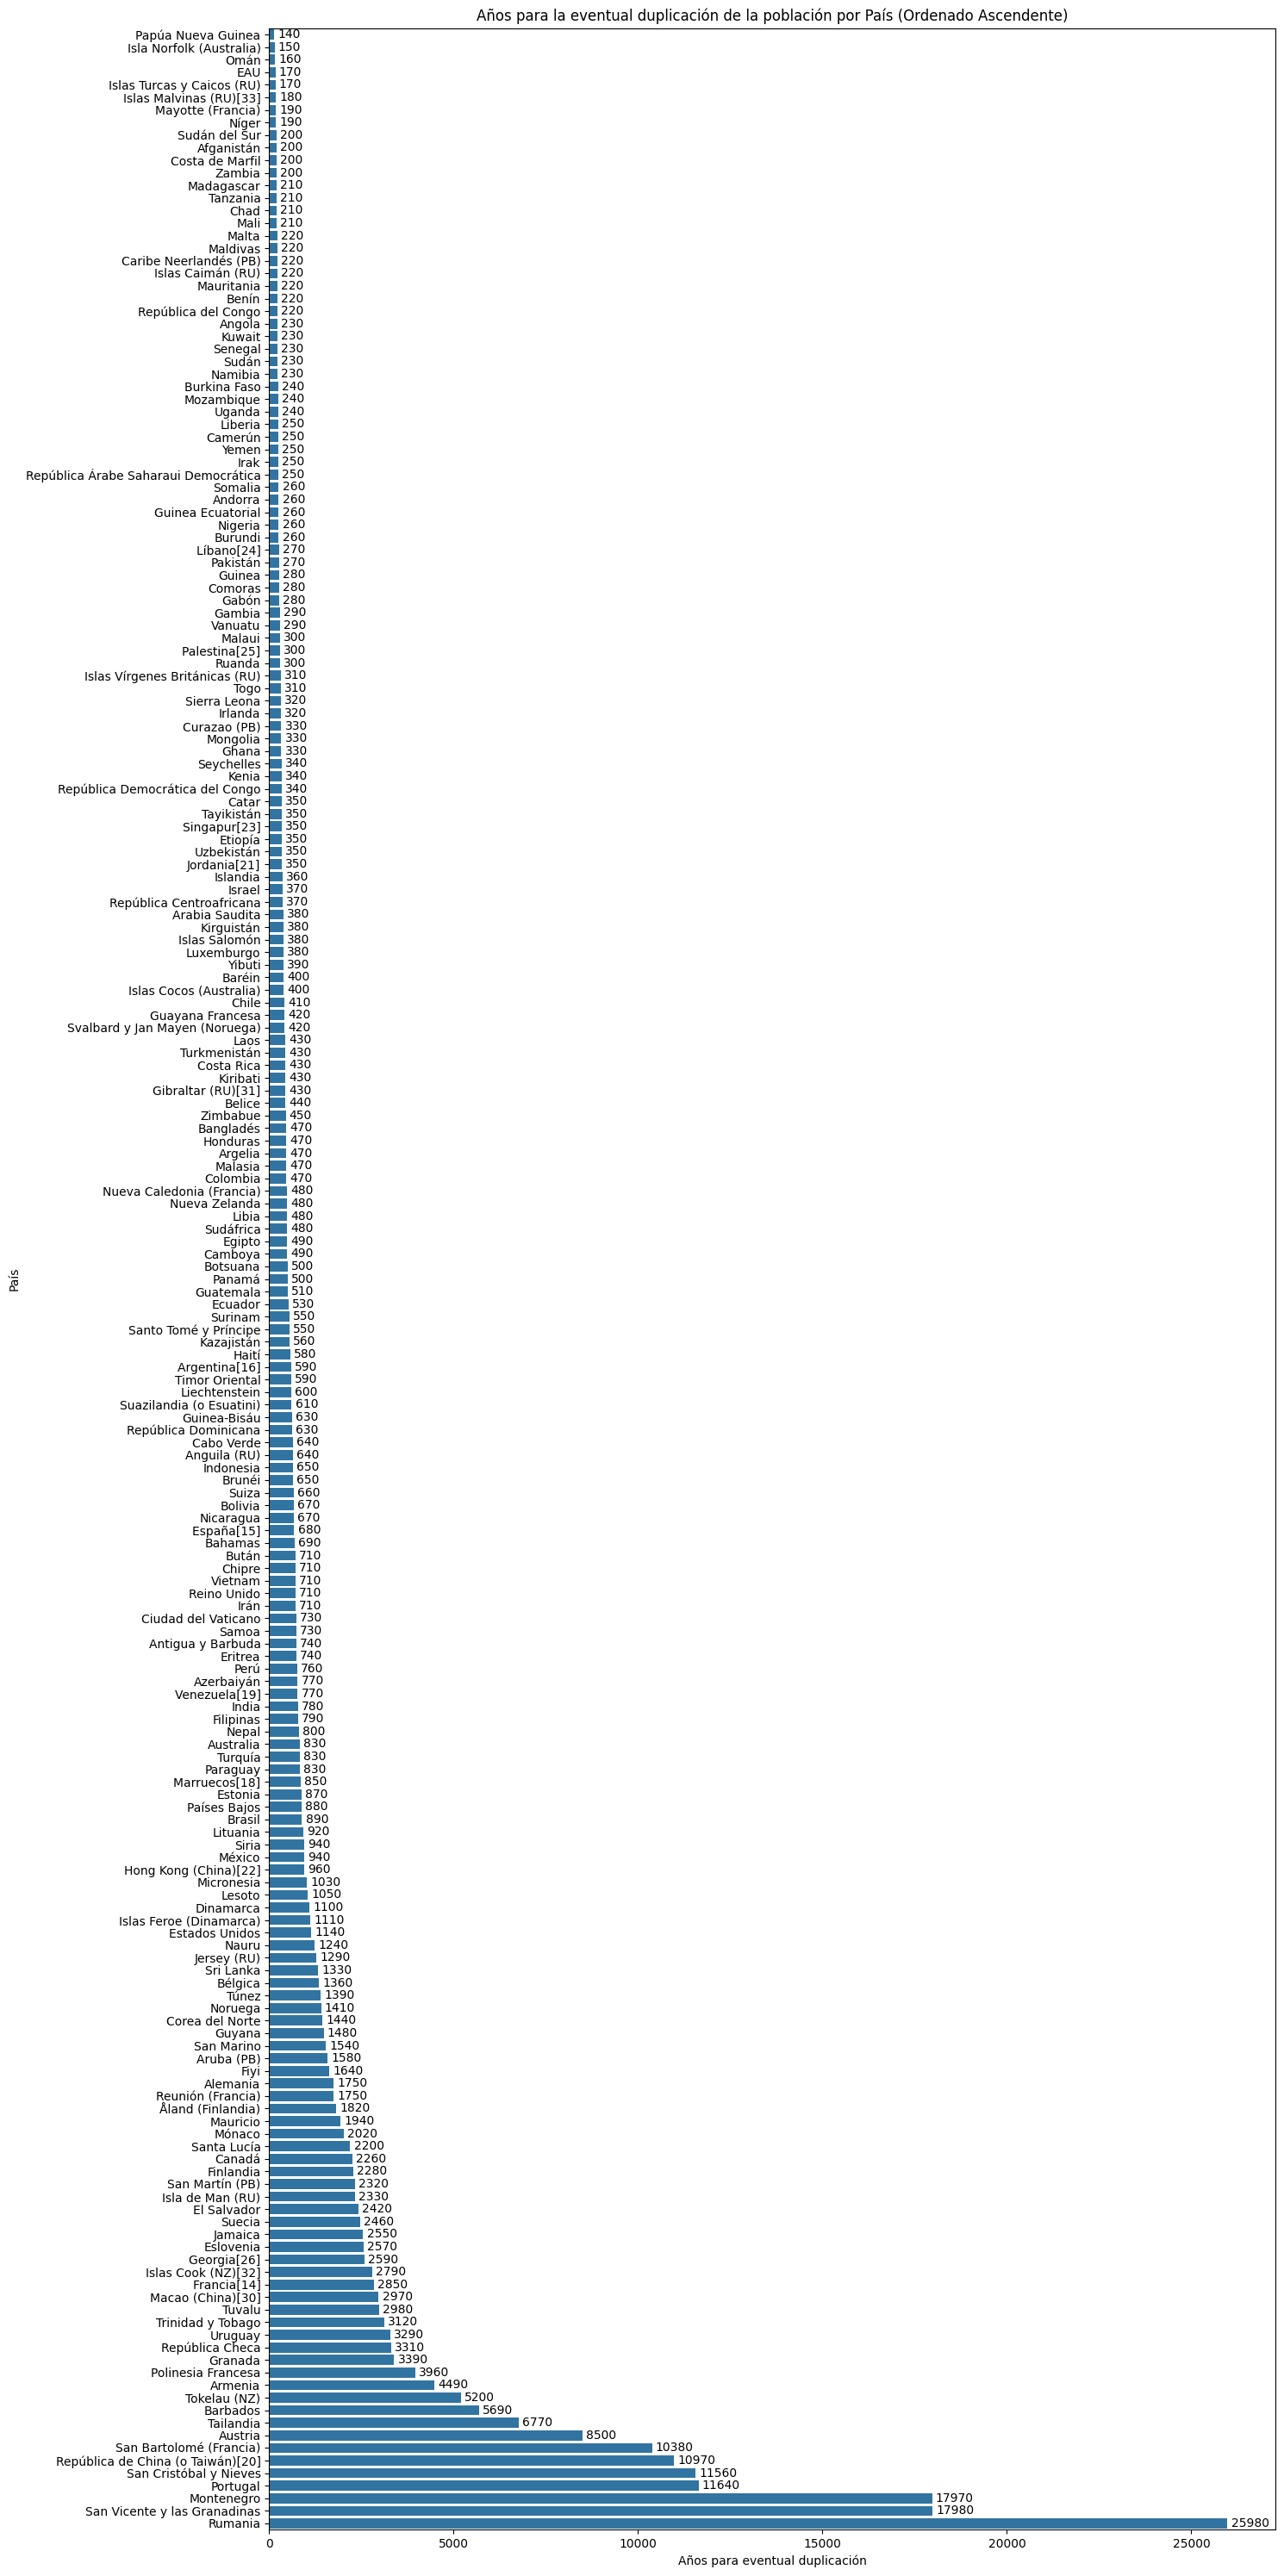

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and convert the 'Años para eventual duplicación' column to numeric, coercing errors to NaN
df_poblacion['Años para even- tual du- pli- ca- ción[9]​'] = df_poblacion['Años para even- tual du- pli- ca- ción[9]​'].astype(str).str.replace(r'[^\d]', '', regex=True)
df_poblacion['Años para even- tual du- pli- ca- ción[9]​'] = pd.to_numeric(df_poblacion['Años para even- tual du- pli- ca- ción[9]​'], errors='coerce')

# Sort the dataframe by the 'Años para eventual duplicación' column in ascending order, dropping rows with NaN values in this column
df_sorted_duplication = df_poblacion.sort_values(by='Años para even- tual du- pli- ca- ción[9]​', ascending=True).dropna(subset=['Años para even- tual du- pli- ca- ción[9]​'])

# Create the bar plot
plt.figure(figsize=(15, 30))
ax = sns.barplot(x='Años para even- tual du- pli- ca- ción[9]​', y='País (o territorio dependiente)', data=df_sorted_duplication)

# Add data labels
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=3)

plt.title('Años para la eventual duplicación de la población por País (Ordenado Ascendente)')
plt.xlabel('Años para eventual duplicación')
plt.ylabel('País')
plt.tight_layout()
plt.show()

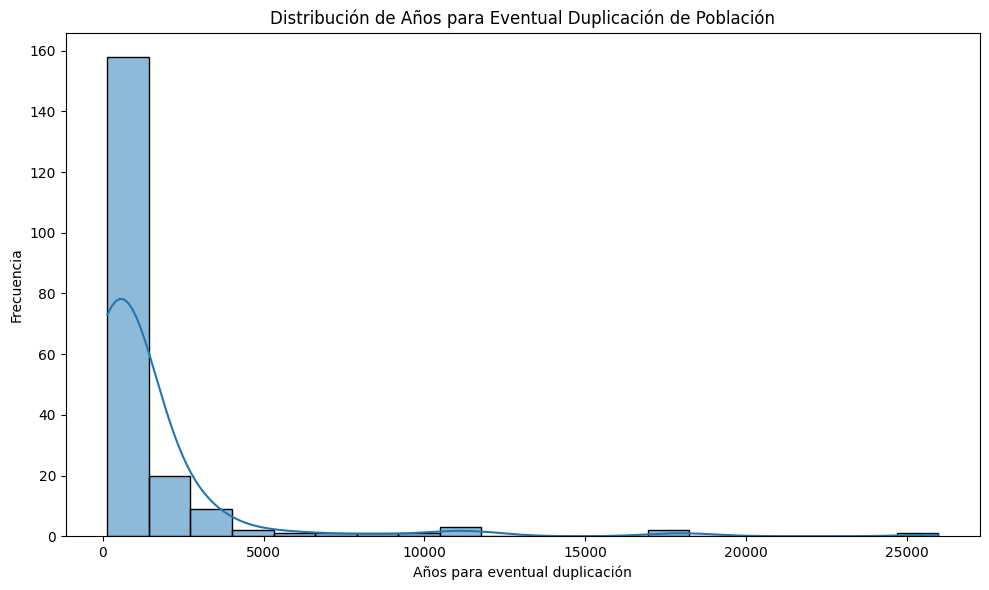

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_sorted_duplication, x='Años para even- tual du- pli- ca- ción[9]​', bins=20, kde=True)
plt.title('Distribución de Años para Eventual Duplicación de Población')
plt.xlabel('Años para eventual duplicación')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

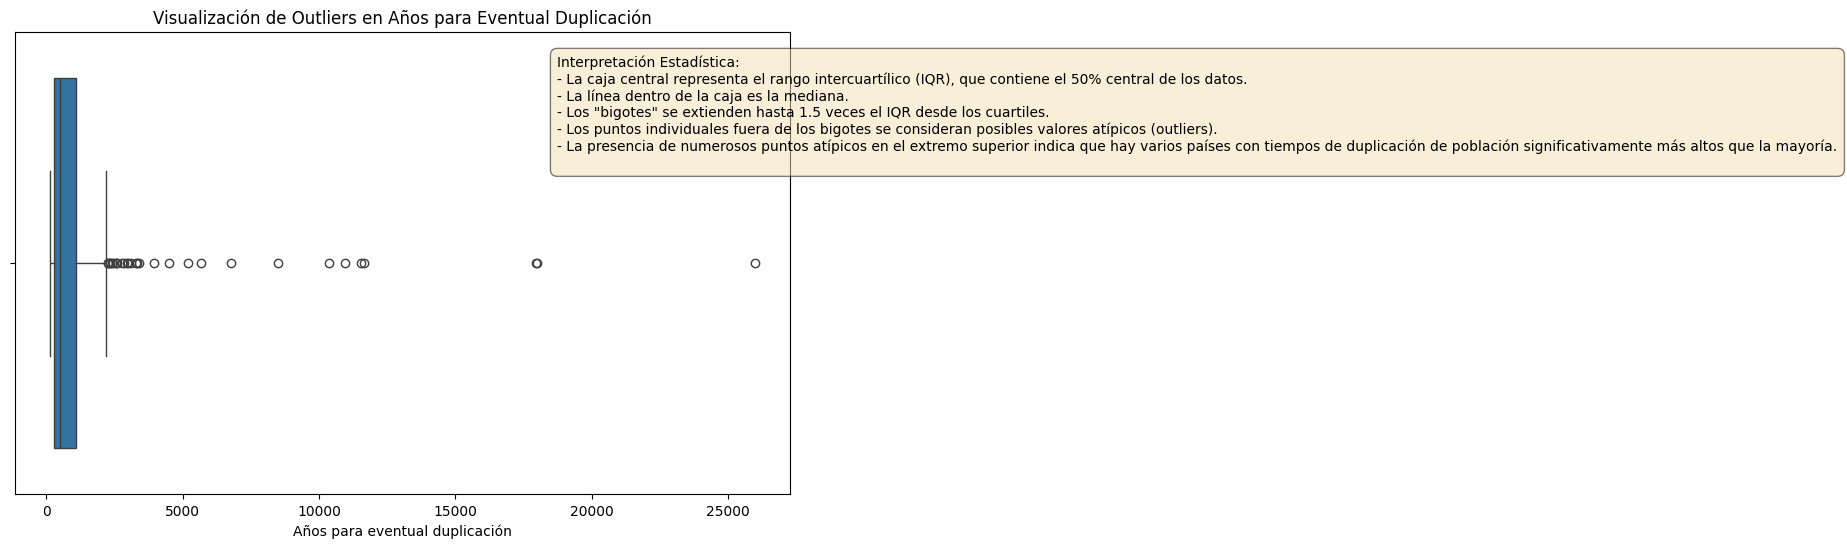

In [79]:
# Add a text box with statistical interpretation
text_box_content = """Interpretación Estadística:
- La caja central representa el rango intercuartílico (IQR), que contiene el 50% central de los datos.
- La línea dentro de la caja es la mediana.
- Los "bigotes" se extienden hasta 1.5 veces el IQR desde los cuartiles.
- Los puntos individuales fuera de los bigotes se consideran posibles valores atípicos (outliers).
- La presencia de numerosos puntos atípicos en el extremo superior indica que hay varios países con tiempos de duplicación de población significativamente más altos que la mayoría.
"""

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df_sorted_duplication['Años para even- tual du- pli- ca- ción[9]​'])
plt.title('Visualización de Outliers en Años para Eventual Duplicación')
plt.xlabel('Años para eventual duplicación')
plt.text(0.7, 0.95, text_box_content, transform=ax.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
plt.show()